# Exploring news extracted from FNC corpus

Extracted news in spanish langauge from the FNC corpus: https://github.com/several27/FakeNewsCorpus. An open source dataset composed of millions of news articles. Around 9,400,000 articles.

To extract these news we followed the following steps:

1. Extracted news with type `satire, fake and reliable` labels.

2. Detecte news in spanish with langdetect.

3. Extract news in spanish.

## Initial exploration

In [109]:
import pandas as pd

df = pd.read_csv('../data/news_csv_spanish.csv', usecols = ['domain', 'type', 'url', 'title', 'content'])

df.head()

,domain,type,url,content,title
0,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/allanada...,Esta mañana unidades del CTI allanaron las ofi...,Allanadas oficinas de Actualidad Panamericana ...
1,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/ya-abrie...,Algo de sosiego trajo a los miles de viajeros ...,Ya abrieron un D1 en trancón de La Línea
2,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/jaguares...,El fin de año es época de anuncios en el fútbo...,Jaguares anunció a Dimayor como patrocinador p...
3,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/embajado...,Un mico de última hora en la nueva ley que rig...,"Embajadora de Florhuila, Claudia Bahamón defie..."
4,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/guia-inv...,Cada nuevo año es la oportunidad para planear ...,Guía para invertir su dinero en 2018


Checking values types

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   domain   4612 non-null   object
 1   type     4612 non-null   object
 2   url      4612 non-null   object
 3   content  4612 non-null   object
 4   title    4612 non-null   object
dtypes: object(5)
memory usage: 180.3+ KB


Checking if there are NA Values

In [97]:
df.isnull().sum()

domain     0
type       0
url        0
content    0
title      0
dtype: int64

Number of news per Category 'Fake' and 'True'

type
fake         125
reliable    3164
satire      1323
dtype: int64


<AxesSubplot:xlabel='type'>

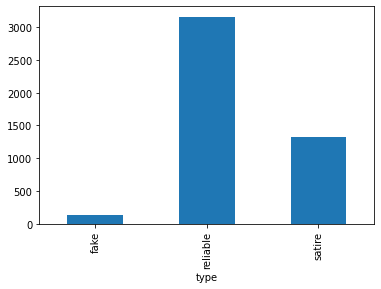

In [98]:
plot_cat = df.groupby('type').size()
print(plot_cat)

plot_cat.plot.bar()

##  Explore fake, reliable and satire news

In [99]:
# we got 125 fake news, 3164 reliable news and 1323 satire news

df_satire = df[df['type'] == 'satire']
df_reliable = df[df['type'] == 'reliable']
df_fake = df[df['type'] == 'fake']

In [100]:
# check reliable news sources with 'domain'

df_reliable.groupby('domain').size().sort_values(ascending = False)

domain
nutritionfacts.org        3084
nytimes.com                 55
in.reuters.com               6
latino.foxnews.com           5
www.cbsnews.com              4
www.buzzfeed.com             3
www.msn.com                  2
www.nba.com                  1
www.huffingtonpost.com       1
www.cnet.com                 1
wiki.mozilla.org             1
news.yahoo.com               1
dtype: int64

In [101]:
# check fake news sources with 'domain'

df_fake.groupby('domain').size().sort_values(ascending = False)

domain
beforeitsnews.com    125
dtype: int64

In [102]:
# check satire news sources with 'domain'

df_satire.groupby('domain').size().sort_values(ascending = False)

domain
actualidadpanamericana.com    1278
elmundotoday.com                45
dtype: int64

## Create a new dataframe

1. Drop `reliable` news domain 'nutritionfacts.org':
    - Short title/headline without information
    - New's content is usually short.    


3. Unify `satire` and `fake` types, priorize news from Spain.


4. Balance the corpus

### 1. Drop nutritionfacts.org reliable news

In [113]:
# drop
df.drop(df[df['domain'] == 'nutritionfacts.org' ].index , inplace = True)
df.reset_index(inplace = True, drop = True)

# check
df_reliable = df[df['type'] == 'reliable']
df_reliable = df[df['type'] == 'reliable']
df_fake = df[df['type'] == 'fake']

print(df.groupby('type').size(), '\n\n', df_reliable.groupby('domain').size().sort_values(ascending = False))

type
fake         125
reliable      80
satire      1323
dtype: int64 

 domain
nytimes.com               55
in.reuters.com             6
latino.foxnews.com         5
www.cbsnews.com            4
www.buzzfeed.com           3
www.msn.com                2
www.nba.com                1
www.huffingtonpost.com     1
www.cnet.com               1
wiki.mozilla.org           1
news.yahoo.com             1
dtype: int64


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   domain   1528 non-null   object
 1   type     1528 non-null   object
 2   url      1528 non-null   object
 3   content  1528 non-null   object
 4   title    1528 non-null   object
dtypes: object(5)
memory usage: 59.8+ KB


In [131]:
df_satire.sample(5)

,domain,type,url,content,title
2217,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/joven-se...,Un hecho insólito se presentó en la tarde de e...,Joven se pierde concierto de Maroon 5 por hace...
1599,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/polemica...,La policía metropolitana de Bogotá detuvo hoy ...,Polémica por venta de abonos para ver enfrenta...
1425,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/rodolfo-...,Un hecho curioso marcó la visita del destacado...,Rodolfo Llinás no entendió cómo funcionan las ...
2057,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/el-proxi...,Mucha controversia ha causado la decisión del ...,Zanqueros y comparsas por la paz reemplazarán ...
1921,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/encuentr...,Autoridades ambientales en compañía de la Poli...,Encuentran nido de ladrones en humedal. Sería ...


### 2. Unify satire and fake news

In [135]:
df['type'] = df['type'].str.replace('fake', 'Fake')
df['type'] = df['type'].str.replace('satire', 'Fake')
df['type'] = df['type'].str.replace('reliable', 'True')

In [136]:
df.head()

,domain,type,url,content,title
0,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/allanada...,Esta mañana unidades del CTI allanaron las ofi...,Allanadas oficinas de Actualidad Panamericana ...
1,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/ya-abrie...,Algo de sosiego trajo a los miles de viajeros ...,Ya abrieron un D1 en trancón de La Línea
2,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/jaguares...,El fin de año es época de anuncios en el fútbo...,Jaguares anunció a Dimayor como patrocinador p...
3,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/embajado...,Un mico de última hora en la nueva ley que rig...,"Embajadora de Florhuila, Claudia Bahamón defie..."
4,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/guia-inv...,Cada nuevo año es la oportunidad para planear ...,Guía para invertir su dinero en 2018
